In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img1 = cv2.imread('1.png')
img2 = cv2.imread('2.png')

# White Patch

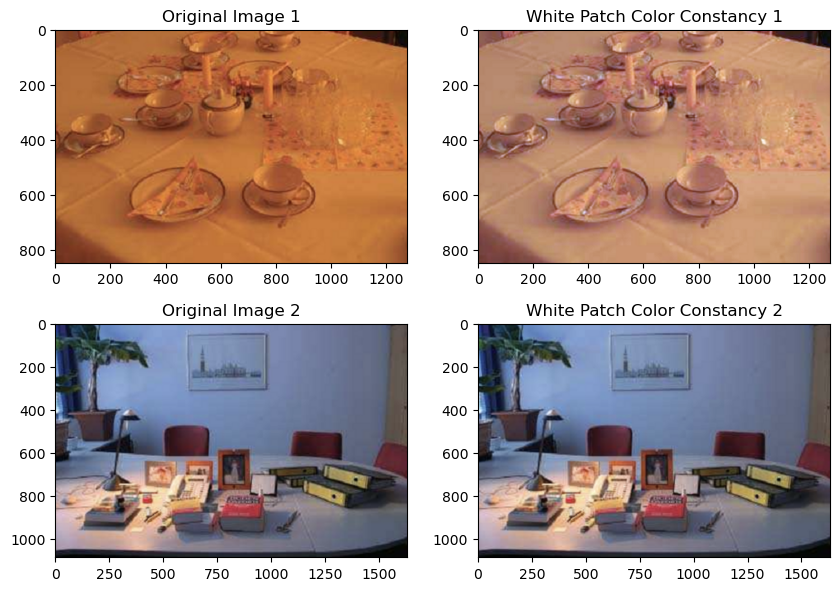

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def white_patch(img):
    # Convert image to float32
    img = img.astype(np.float32)

    # Calculate the maximum value for each channel
    max_val = np.max(img, axis=(0, 1))

    # Divide each channel by its maximum value
    result = img / max_val

    # Clip values to [0, 1] range
    result = np.clip(result, 0, 1)

    # Convert back to uint8
    result = (result * 255).astype(np.uint8)

    return result

# Apply white patch color constancy to the first image
result1 = white_patch(img1)

# Apply white patch color constancy to the second image
result2 = white_patch(img2)

# Display the original and result images side by side
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
axes[0, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image 1')
axes[0, 1].imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('White Patch Color Constancy 1')
axes[1, 0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Original Image 2')
axes[1, 1].imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('White Patch Color Constancy 2')
plt.show()

# Gray World

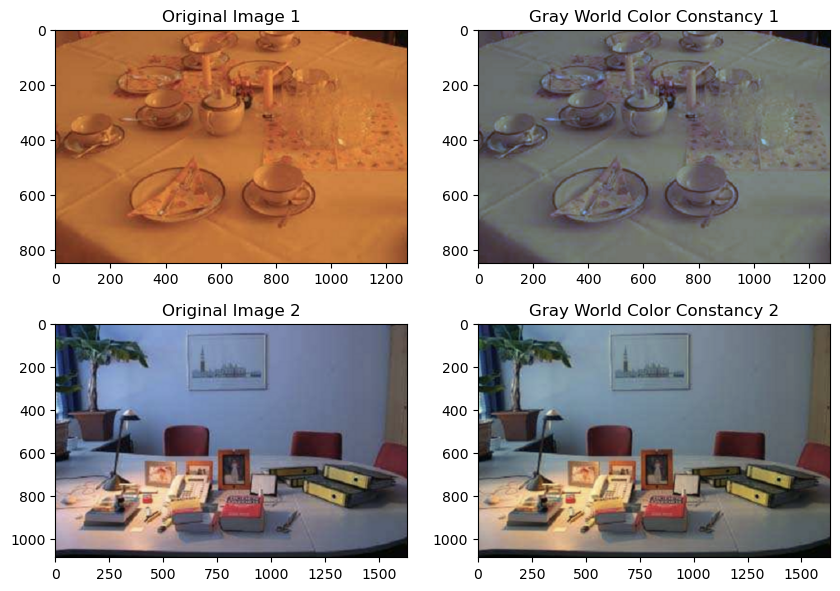

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gray_world(img):
    # Convert image to float32
    img = img.astype(np.float32)

    # Calculate the average value for each channel
    avg_val = np.mean(img, axis=(0, 1))

    # Calculate the scaling factor for each channel
    scale = np.array([avg_val[1]/avg_val[0], 1.0, avg_val[1]/avg_val[2]])

    # Multiply each channel by its scaling factor
    result = img * scale.reshape((1, 1, 3))

    # Clip values to [0, 255] range
    result = np.clip(result, 0, 255)

    # Convert back to uint8
    result = result.astype(np.uint8)

    return result

# Load the first image

# Apply gray world color constancy to the first image
result1 = gray_world(img1)

# Load the second image

# Apply gray world color constancy to the second image
result2 = gray_world(img2)

# Display the original and result images side by side
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
axes[0, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image 1')
axes[0, 1].imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Gray World Color Constancy 1')
axes[1, 0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Original Image 2')
axes[1, 1].imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Gray World Color Constancy 2')
plt.show()

# Gray Edge

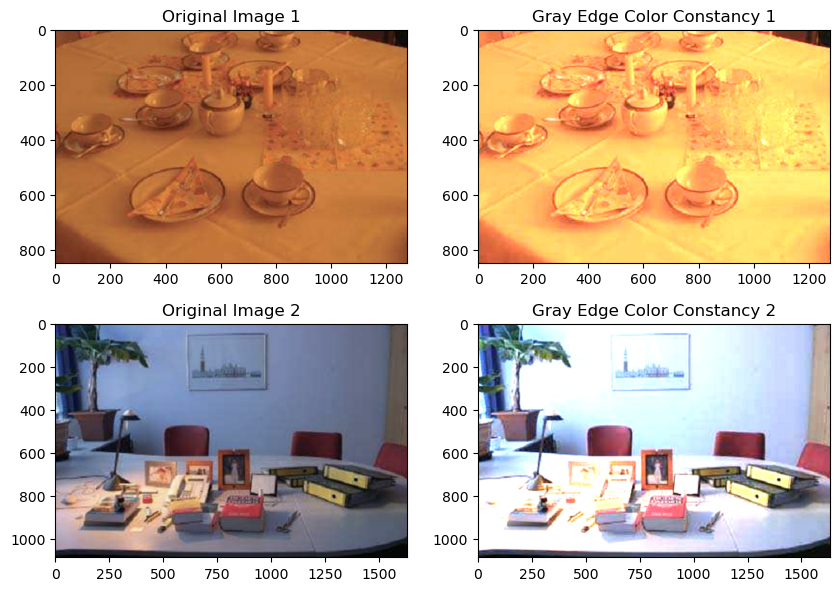

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gray_edge(img, percentile=99.9):
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Calculate the gradient magnitude
    grad_x = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)
    grad_mag = np.sqrt(grad_x**2 + grad_y**2)

    # Normalize the gradient magnitude to [0, 1]
    grad_mag /= np.max(grad_mag)

    # Calculate the scaling factor for each channel
    scale = np.divide(np.array([1.0, 1.0, 1.0]), np.percentile(grad_mag, percentile))

    # Multiply each channel by its scaling factor
    result = img * scale.reshape((1, 1, 3))

    # Clip values to [0, 255] range
    result = np.clip(result, 0, 255)

    # Convert back to uint8
    result = result.astype(np.uint8)

    return result

# Apply gray edge color constancy to the first image
result1 = gray_edge(img1)

# Apply gray edge color constancy to the second image
result2 = gray_edge(img2)

# Display the original and result images side by side
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
axes[0, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image 1')
axes[0, 1].imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Gray Edge Color Constancy 1')
axes[1, 0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Original Image 2')
axes[1, 1].imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Gray Edge Color Constancy 2')
plt.show()